In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            confusion_matrix, 
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

In [2]:
seed = 42
np.random.seed(seed)

### Quick Overview of Logistic Regression 

Y_hat(Z) = 1 / (1 + exp(-Z))

P(Y = 1 | X) = Y_hat(Z)

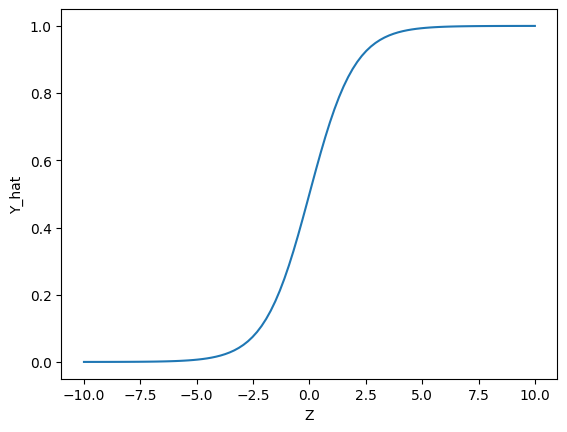

In [3]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

X_linespace = np.linspace(-10, 10, 100)
Y_hat = sigmoid(X_linespace)

plt.plot(X_linespace, Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_hat')
plt.show()

### Loading the Data 

In [4]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### Model Training 


In [5]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [6]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [7]:
Y_hat_train

array([0, 0, 0, ..., 1, 1, 0], shape=(12668,))

In [8]:
Y_proba_train

array([[0.83201964, 0.16798036],
       [0.91486415, 0.08513585],
       [0.74766146, 0.25233854],
       ...,
       [0.46479775, 0.53520225],
       [0.36867483, 0.63132517],
       [0.7050599 , 0.2949401 ]], shape=(12668, 2))

### Evaluation

In [9]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

In [10]:
print(f"accuracy : {accuracy}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"f1_score : {f1_score}")

accuracy : 0.6948474237118559
precision : 0.33884297520661155
recall : 0.6542553191489362
f1_score : 0.44646098003629764


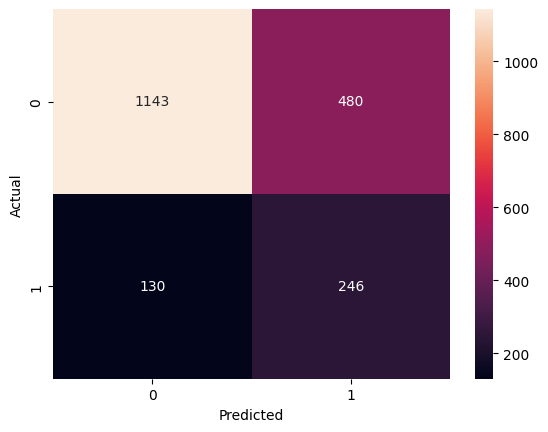

In [11]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()